In [1]:
import glob
import sys

import numpy as np
import pandas as pd

from sklearn.svm import SVC
sys.path.append("../../../")

from helpers.experiment import experiment



Commencing Experiment: SVC_dataset_00_all

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.780972

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4638  0.9091    0.6143      374  0.6395
  genre_classical     0.9138  0.9067    0.9102     4221  0.8809
    genre_country     0.5856  0.9419    0.7222      327  0.7368
      genre_disco     0.5297  0.9862    0.6892      289  0.7171
     genre_hiphop     0.7889  0.9030    0.8421     1701  0.8257
       genre_jazz     0.7209  0.8719    0.7892     1241  0.7751
      genre_metal     0.6741  0.9143    0.7760      665  0.7753
        genre_pop     0.7904  0.5983    0.6810     4274  0.6028
     genre_reggae     0.7598  0.9112    0.8286      788  0

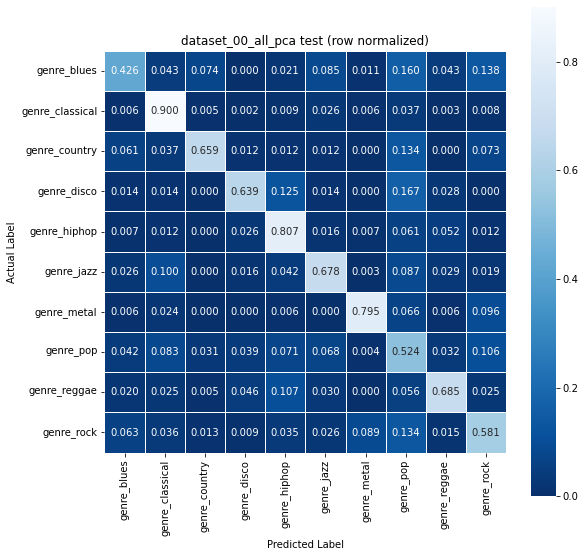



Commencing Experiment: SVC_dataset_01_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.456792

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1528  0.4759    0.2313      374  0.2420
  genre_classical     0.8358  0.8069    0.8211     4221  0.7640
    genre_country     0.1983  0.6483    0.3037      327  0.3378
      genre_disco     0.1007  0.6194    0.1733      289  0.2214
     genre_hiphop     0.4183  0.2604    0.3210     1701  0.2737
       genre_jazz     0.3227  0.5117    0.3958     1241  0.3476
      genre_metal     0.3556  0.7113    0.4742      665  0.4758
        genre_pop     0.6187  0.1781    0.2765     4274  0.2370
     genre_reggae     0.2545  0.5178    0.3413      788  

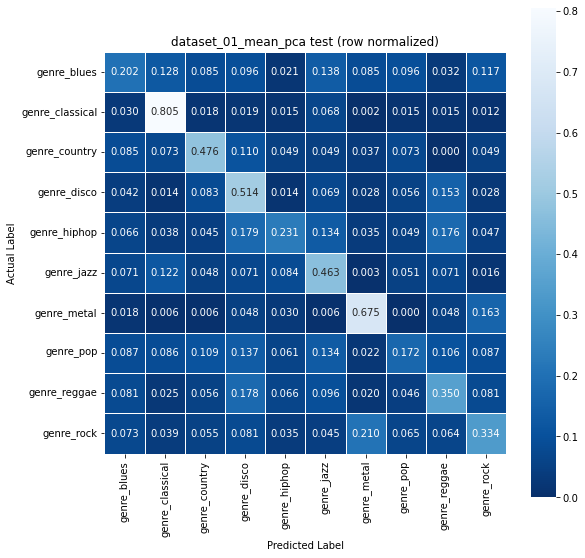



Commencing Experiment: SVC_dataset_02_mean_cov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.643033

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2755  0.7299    0.4000      374  0.4300
  genre_classical     0.8853  0.8650    0.8750     4221  0.8347
    genre_country     0.3457  0.8807    0.4966      327  0.5396
      genre_disco     0.2936  0.9204    0.4452      289  0.5077
     genre_hiphop     0.6264  0.7049    0.6633     1701  0.6250
       genre_jazz     0.5696  0.7518    0.6481     1241  0.6235
      genre_metal     0.4489  0.8511    0.5877      665  0.5983
        genre_pop     0.7614  0.3584    0.4874     4274  0.4313
     genre_reggae     0.5993  0.8198    0.6924      7

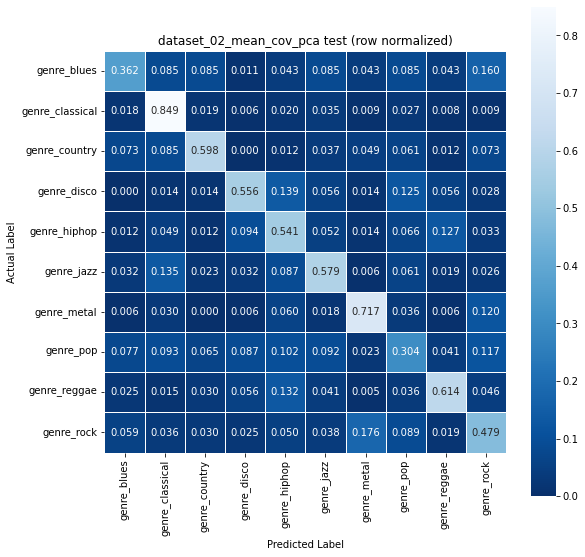



Commencing Experiment: SVC_dataset_03_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.230796



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support      mcc
                                                                
      genre_blues     0.0000  0.0000    0.0000      374  -0.0011
  genre_classical     0.7081  0.5688    0.6308     4221   0.5318
    genre_country     0.0345  0.5015    0.0645      327   0.0695
      genre_disco     0.0909  0.0242    0.0383      289   0.0386
     genre_hiphop     0.0000  0.0000    0.0000     1701   0.0000
       genre_jazz     0.0000  0.0000    0.0000     1241  -0.0037
      genre_metal     0.0849  0.6752    0.1509      665   0.1592
        genre_pop     0.0000  0.0000    0.0000     4274   0.0000
     genre_reggae     0.0000  0.0000    0.0000      788   0.0000
       genre_rock     0.2583  0.2878    0.2723     3200   0.0934
                                                                


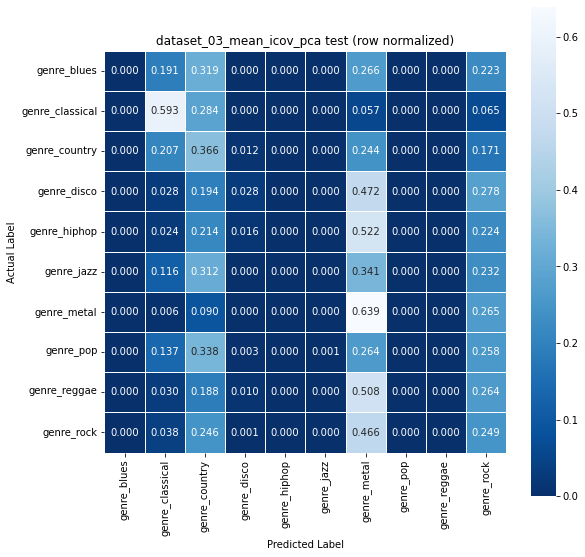



Commencing Experiment: SVC_dataset_04_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.546838

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1650  0.5401    0.2528      374  0.2717
  genre_classical     0.8719  0.8178    0.8440     4221  0.7957
    genre_country     0.2293  0.7370    0.3498      327  0.3927
      genre_disco     0.1738  0.8062    0.2859      289  0.3549
     genre_hiphop     0.5558  0.5450    0.5503     1701  0.5011
       genre_jazz     0.4842  0.6422    0.5521     1241  0.5178
      genre_metal     0.3690  0.8150    0.5080      665  0.5234
        genre_pop     0.6876  0.2380    0.3536     4274  0.3109
     genre_reggae     0.5082  0.7094    0.5922  

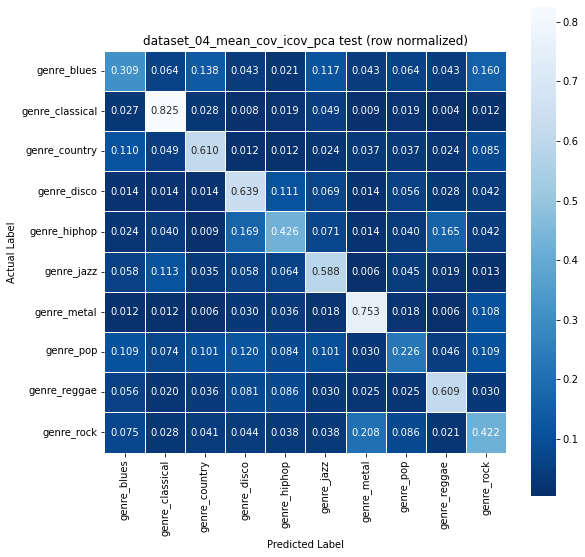



Commencing Experiment: SVC_dataset_05_pvtt

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.373888

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0494  0.0428    0.0458      374  0.0261
  genre_classical     0.8636  0.7873    0.8236     4221  0.7707
    genre_country     0.0575  0.3303    0.0980      327  0.0984
      genre_disco     0.0917  0.2180    0.1291      289  0.1187
     genre_hiphop     0.2794  0.1270    0.1746     1701  0.1308
       genre_jazz     0.2565  0.4706    0.3320     1241  0.2777
      genre_metal     0.2057  0.7594    0.3237      665  0.3532
        genre_pop     0.5315  0.1341    0.2141     4274  0.1686
     genre_reggae     0.1835  0.5990    0.2810      788  

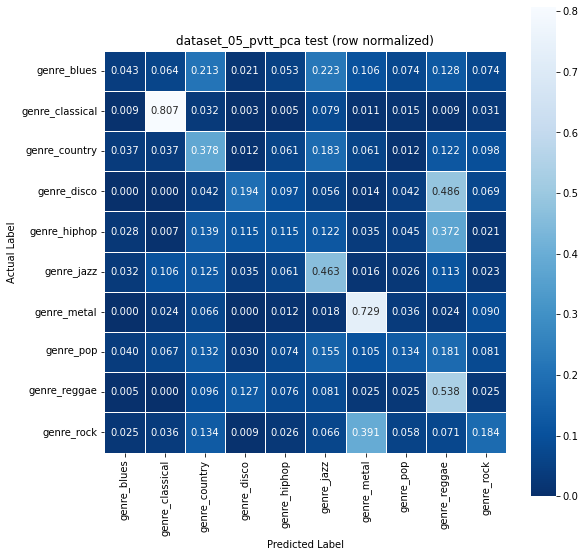



Commencing Experiment: SVC_dataset_06_pvtt_mean

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.484719

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1473  0.4679    0.2241      374  0.2343
  genre_classical     0.8791  0.8337    0.8558     4221  0.8106
    genre_country     0.1851  0.6453    0.2877      327  0.3238
      genre_disco     0.1342  0.6055    0.2197      289  0.2614
     genre_hiphop     0.4063  0.2969    0.3431     1701  0.2869
       genre_jazz     0.3608  0.5431    0.4336     1241  0.3890
      genre_metal     0.3217  0.7474    0.4498      665  0.4610
        genre_pop     0.6214  0.2066    0.3101     4274  0.2581
     genre_reggae     0.3209  0.5990    0.4179      

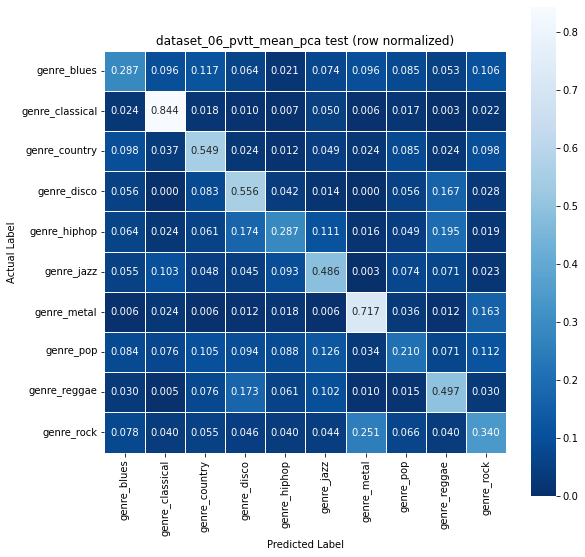



Commencing Experiment: SVC_dataset_07_pvtt_mean_cov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.648536

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2806  0.7299    0.4053      374  0.4344
  genre_classical     0.8951  0.8730    0.8839     4221  0.8465
    genre_country     0.3570  0.8624    0.5049      327  0.5429
      genre_disco     0.2982  0.9100    0.4492      289  0.5089
     genre_hiphop     0.6264  0.7096    0.6654     1701  0.6273
       genre_jazz     0.5749  0.7703    0.6584     1241  0.6354
      genre_metal     0.4395  0.8526    0.5801      665  0.5919
        genre_pop     0.7554  0.3620    0.4894     4274  0.4305
     genre_reggae     0.6039  0.8338    0.7004  

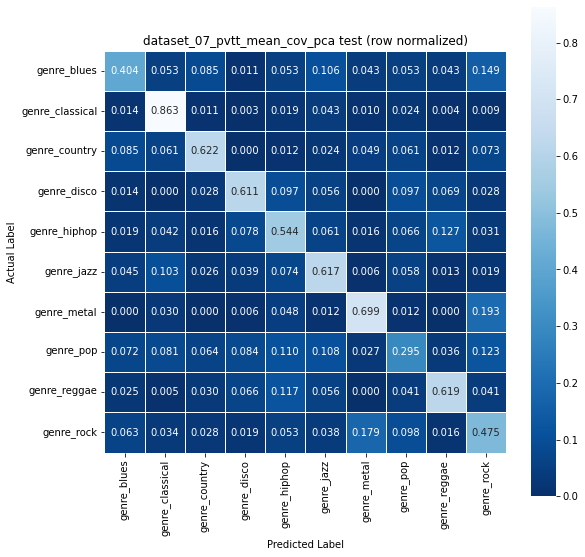



Commencing Experiment: SVC_dataset_08_pvtt_mean_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.345492

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0253  0.0348    0.0293      374  0.0041
  genre_classical     0.8555  0.7880    0.8203     4221  0.7656
    genre_country     0.0604  0.5168    0.1081      327  0.1332
      genre_disco     0.0718  0.1349    0.0938      289  0.0771
     genre_hiphop     0.3133  0.1070    0.1595     1701  0.1339
       genre_jazz     0.2570  0.4440    0.3256     1241  0.2691
      genre_metal     0.2234  0.7654    0.3459      665  0.3742
        genre_pop     0.3333  0.0009    0.0019     4274  0.0051
     genre_reggae     0.1692  0.5914    0.2631 

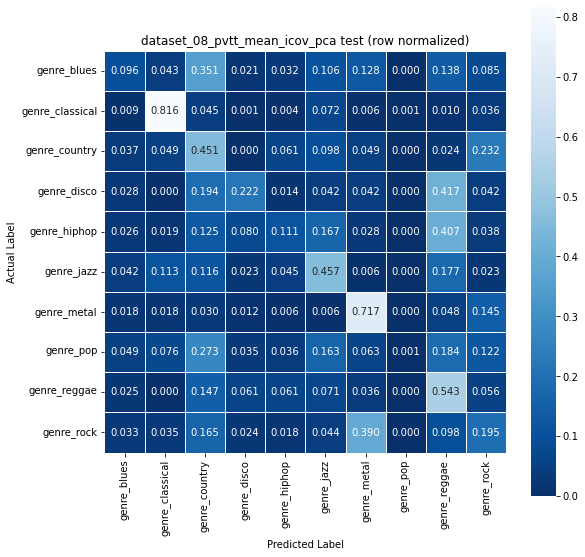



Commencing Experiment: SVC_dataset_09_pvtt_mean_cov_icov

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.558724

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.1671  0.5668    0.2581      374  0.2810
  genre_classical     0.8930  0.8401    0.8657     4221  0.8241
    genre_country     0.2386  0.7523    0.3623      327  0.4059
      genre_disco     0.1841  0.8097    0.3000      289  0.3676
     genre_hiphop     0.5608  0.5556    0.5582     1701  0.5096
       genre_jazz     0.4911  0.6648    0.5649     1241  0.5324
      genre_metal     0.3669  0.8165    0.5063      665  0.5222
        genre_pop     0.6952  0.2454    0.3628     4274  0.3198
     genre_reggae     0.5143  0.7081    0.5

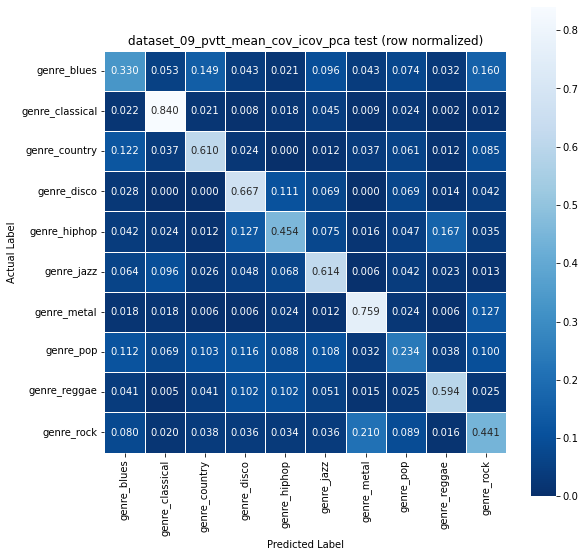



Commencing Experiment: SVC_dataset_10_melspectrograms_flattened

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.667506

/home/jovyan/github/mids-w207/mids_w207_music_genre/member_workspaces/rich/models/../../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.6579  0.9412    0.7745      374  0.7815
  genre_classical     0.8425  0.8375    0.8400     4221  0.7876
    genre_country     0.6050  0.9694    0.7450      327  0.7605
      genre_disco     0.5507  0.9965    0.7094      289  0.7355
     genre_hiphop     0.6308  0.7372    0.6799     1701  0.6438
       genre_jazz     0.4967  0.7961    0.6118     1241  0.5931
      genre_metal     0.4327  0.8902    0.5824      665  0.6007
        genre_pop     0.7015  0.4305    0.5336     4274  0.4438
     genre_reggae     0.6526  0.9201

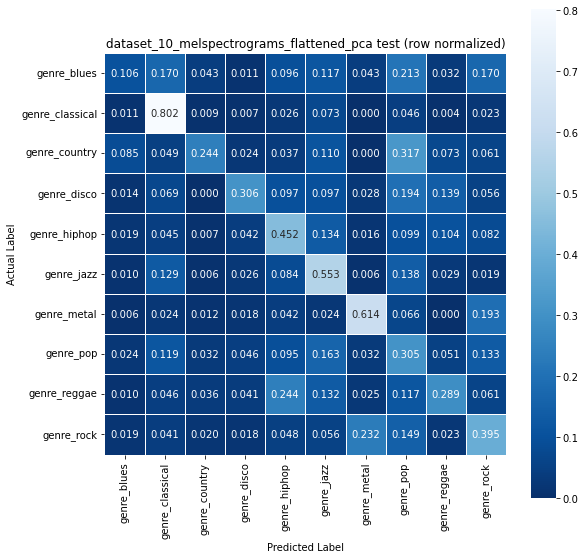

In [2]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
   
for dataset in datasets:
     
    if "spectrogram" in dataset:
        n_components = 2400
    else:
        n_components = .95
    
    model = model = SVC(class_weight='balanced')
    experiment(model, dataset, pca_components=n_components, result_filename="rich_results.json")